# Fadhl Alakwaa, University of Michigan, Department of Computional Medicine and Bioinformatics 08/02/2019 
# In this notebook I will generate the figures in my paper entitled "Metabolomic signatures for Breast Cancer patients"
# We want to cluster patients based on their metabolome profiles, then assign significant metabolites to these clusters. We will implement the below pipeline:

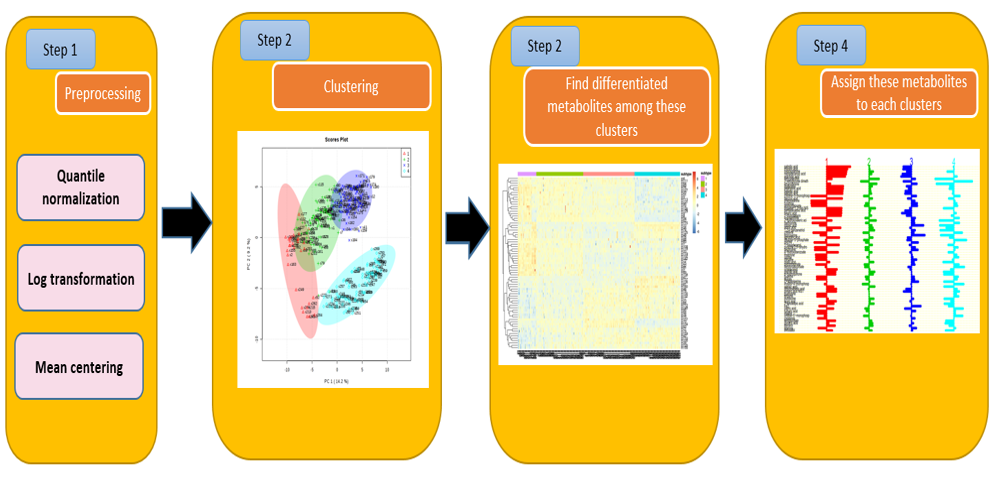

In [6]:
getwd()

[1] "C:/mayo_jovyan/paper2"

In [53]:
save.image(file="Metabolomics_signature.RData")

# If you need to load the final results without running all cells

In [2]:
load(file="Metabolomics_signature.RData")

In [2]:
library(tsne)
library(rgl)
library(FactoMineR)
library(vegan)
library(dplyr)
library(cluster)
library(pheatmap)
library(siggenes)
library(pamr)
library(factoextra)

In [3]:
#Load the data 
prostate_df <- read.csv(file="er_162.csv",row.names=1,check.names=F)

In [4]:
# This data has 271 samples (204 ER+ and 67 ER-) 
head(prostate_df)
dim(prostate_df)
table(prostate_df$Label)

Label data  1-hexadecanol 1-monostearin 1,2,4-benzenetriol
ERn_train_1 NEG   data3 -0.002730343  -0.4748006    -0.24947751       
ERn_train_2 NEG   data3  0.946409484   0.9764088     0.48084664       
ERn_train_3 NEG   data3 -0.647678760  -1.5033170     0.04583202       
ERn_train_4 NEG   data3  1.595684713   1.5325413     1.02560959       
ERn_train_5 NEG   data3 -0.612099922  -1.2412531     0.86077336       
ERn_train_6 NEG   data3  0.731335141  -0.5830660     0.61635312       
            1,5-anhydroglucitol 2-aminoadipic acid 2-hydroxybutanoic acid
ERn_train_1  0.3056528           0.70357746        -0.9544935            
ERn_train_2 -1.7411687           0.21003790        -0.1566122            
ERn_train_3 -0.5512146          -0.31328461        -0.4754197            
ERn_train_4  0.9226118          -1.25538587         1.0732602            
ERn_train_5 -0.3836978           0.86181275         0.6835887            
ERn_train_6 -0.5512146           0.02412836        -1.3346687            
            2-hydroxyglutaric acid 2-hydroxyvaleric acid ... trehalose
ERn_train_1 -0.81129805             0.24104692           ... 1.3411156
ERn_train_2  0.36373836             1.82387556           ... 0.1562118
ERn_train_3  1.57286950             0.52506779           ... 0.2318434
ERn_train_4 -0.48067255             2.22937257           ... 2.0627652
ERn_train_5 -0.05201023             0.07714383           ... 0.4215975
ERn_train_6 -0.57484142            -0.00166341           ... 0.7289783
            tryptophan tyrosine   uracil     urea       uric acid  uridine   
ERn_train_1 -0.8849776  0.5610222 -0.1128325 -1.2621217 -0.9827223 -2.0634750
ERn_train_2 -1.2370125 -2.1935587 -0.8140923 -0.2119556 -0.6654228 -1.2448713
ERn_train_3 -0.6701237  0.3337228  1.0799324 -0.7259577  0.1335168  0.8570434
ERn_train_4 -1.1569418 -3.0643776 -1.5898487  0.3977156  0.4725895 -3.1719541
ERn_train_5 -0.3856378  0.1197159  1.0799324  0.6760385  1.5670982  1.0193792
ERn_train_6 -0.5276051  0.1197159  1.0799324 -0.7259577  0.1335168  0.7038600
            uridine-5'-monophosphate valine     xanthine  
ERn_train_1  0.03120411              -0.9033616 -0.1884919
ERn_train_2 -0.44888277              -1.1632272 -0.6542533
ERn_train_3 -0.11688049               0.4394813  2.8966080
ERn_train_4 -0.44888277              -0.3975886  0.1383978
ERn_train_5 -0.66267002               0.1250034  0.1972936
ERn_train_6 -0.66267002               0.1250034  1.4295185

[1] 271 164


NEG POS 
 67 204 

In [5]:
# Select only the metabolites, we have 162 metabolites  
mydata <-select(prostate_df,-c(Label,data))
head(mydata)
dim(mydata)

1-hexadecanol 1-monostearin 1,2,4-benzenetriol 1,5-anhydroglucitol
ERn_train_1 -0.002730343  -0.4748006    -0.24947751         0.3056528         
ERn_train_2  0.946409484   0.9764088     0.48084664        -1.7411687         
ERn_train_3 -0.647678760  -1.5033170     0.04583202        -0.5512146         
ERn_train_4  1.595684713   1.5325413     1.02560959         0.9226118         
ERn_train_5 -0.612099922  -1.2412531     0.86077336        -0.3836978         
ERn_train_6  0.731335141  -0.5830660     0.61635312        -0.5512146         
            2-aminoadipic acid 2-hydroxybutanoic acid 2-hydroxyglutaric acid
ERn_train_1  0.70357746        -0.9544935             -0.81129805           
ERn_train_2  0.21003790        -0.1566122              0.36373836           
ERn_train_3 -0.31328461        -0.4754197              1.57286950           
ERn_train_4 -1.25538587         1.0732602             -0.48067255           
ERn_train_5  0.86181275         0.6835887             -0.05201023           
ERn_train_6  0.02412836        -1.3346687             -0.57484142           
            2-hydroxyvaleric acid 2-ketoadipic acid
ERn_train_1  0.24104692           -0.09954771      
ERn_train_2  1.82387556            1.42213859      
ERn_train_3  0.52506779           -0.61875095      
ERn_train_4  2.22937257            2.21766189      
ERn_train_5  0.07714383           -0.68974910      
ERn_train_6 -0.00166341           -0.02734866      
            2-ketoglucose dimethylacetal NIST ... trehalose tryptophan
ERn_train_1 -0.8413411                        ... 1.3411156 -0.8849776
ERn_train_2 -0.8413411                        ... 0.1562118 -1.2370125
ERn_train_3 -0.8413411                        ... 0.2318434 -0.6701237
ERn_train_4 -0.8413411                        ... 2.0627652 -1.1569418
ERn_train_5 -0.8413411                        ... 0.4215975 -0.3856378
ERn_train_6 -0.8413411                        ... 0.7289783 -0.5276051
            tyrosine   uracil     urea       uric acid  uridine   
ERn_train_1  0.5610222 -0.1128325 -1.2621217 -0.9827223 -2.0634750
ERn_train_2 -2.1935587 -0.8140923 -0.2119556 -0.6654228 -1.2448713
ERn_train_3  0.3337228  1.0799324 -0.7259577  0.1335168  0.8570434
ERn_train_4 -3.0643776 -1.5898487  0.3977156  0.4725895 -3.1719541
ERn_train_5  0.1197159  1.0799324  0.6760385  1.5670982  1.0193792
ERn_train_6  0.1197159  1.0799324 -0.7259577  0.1335168  0.7038600
            uridine-5'-monophosphate valine     xanthine  
ERn_train_1  0.03120411              -0.9033616 -0.1884919
ERn_train_2 -0.44888277              -1.1632272 -0.6542533
ERn_train_3 -0.11688049               0.4394813  2.8966080
ERn_train_4 -0.44888277              -0.3975886  0.1383978
ERn_train_5 -0.66267002               0.1250034  0.1972936
ERn_train_6 -0.66267002               0.1250034  1.4295185

[1] 271 162

In [ ]:
# what kind of normaliztion we performed?  Quantile normalization, mean centering and auto-scalling 
# Perform quantile normalization ("QuantileNorm"), log transformation ("LogNorm"), and Auto scaling ("AutoMean").
#https://github.com/xia-lab/MetaboAnalystR/blob/master/vignettes/Introduction_to_MetaboAnalystR.Rmd

In [ ]:
mSet<-InitDataObjects("conc", "stat", FALSE)
mSet <- Read.TextData(mSet, "data_with_label_CANADA_correct_format.csv", "rowu", "disc");
mSet<-SanityCheckData(mSet);
mSet<-ReplaceMin(mSet);
mSet <- Normalization(mSet, rowNorm = "QuntileNorm", transNorm = "LogNorm", scaleNorm = "AutoNorm", ref="NULL", ratio=FALSE, ratioNum=20)
mSet<-PlotNormSummary(mSet, "feature_norm", format="png", dpi=300, width=0)
mSet<-PlotSampleNormSummary(mSet, "sample_norm", format="pdf", width=NA)
data_normalized=mSet$dataSet$norm
data_normalized=(merge(data_normalized,batches_labels['label'],by="row.names",all.x=TRUE))
rownames(data_normalized)=data_normalized[,'Row.names']
data_normalized=data_normalized[,-1]
head(data_normalized)

In [ ]:
# Step 2: we will cluster samples using k-means

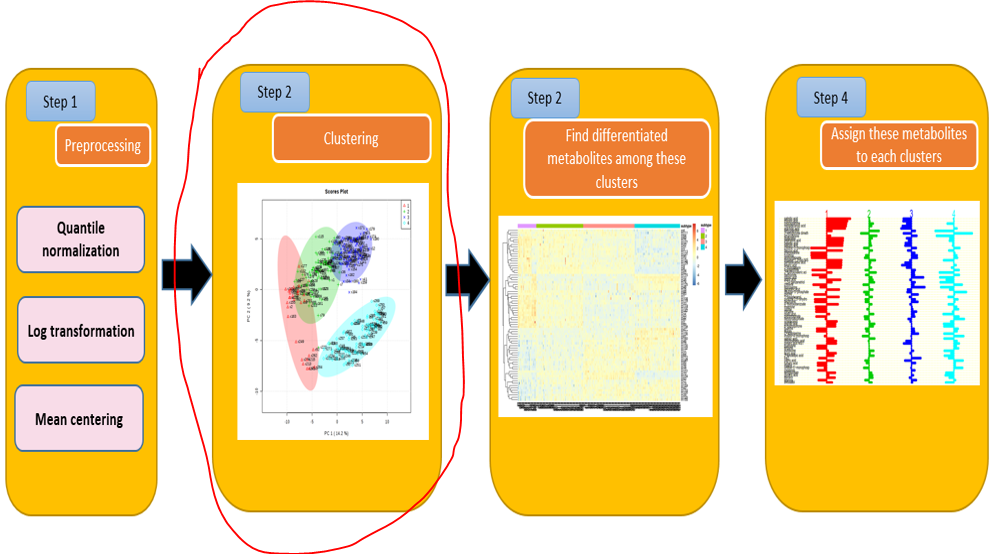

In [6]:
# Cluster these samples using k-means, Please set the seed as 123 to assure the reproducibility of the results 
set.seed(123)
km <- kmeans(mydata,4,10000)
t(km$cluster)

ERn_train_1 ERn_train_2 ERn_train_3 ERn_train_4 ERn_train_5 ERn_train_6
[1,] 3           2           1           2           1           1          
     ERn_train_7 ERn_train_8 ERn_train_9 ERn_train_10 ... ERp_val_52 ERp_val_53
[1,] 3           3           2           2            ... 2          4         
     ERp_val_54 ERp_val_55 ERp_val_56 ERp_val_57 ERp_val_58 ERp_val_59
[1,] 2          4          4          4          4          4         
     ERp_val_60 ERp_val_61
[1,] 4          4

In [7]:
# How many samples in each cluster
table(km$cluster)


 1  2  3  4 
86 31 78 76 

In [38]:
pdf("Figure2.pdf")
pc<-prcomp(mydata)
plot(pc$x[,1], pc$x[,2],col=km$cluster,pch=16)
pc<-cbind(pc$x[,1], pc$x[,2])
ordispider(pc, factor(km$cluster), label = TRUE)
ordihull(pc, factor(km$cluster), lty = "dotted")
dev.off()

png 
  2

In [ ]:
Determine the optimal number of k
https://uc-r.github.io/kmeans_clustering
1-Elbow method
2-Silhouette method
3- Gap statistic

In [10]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

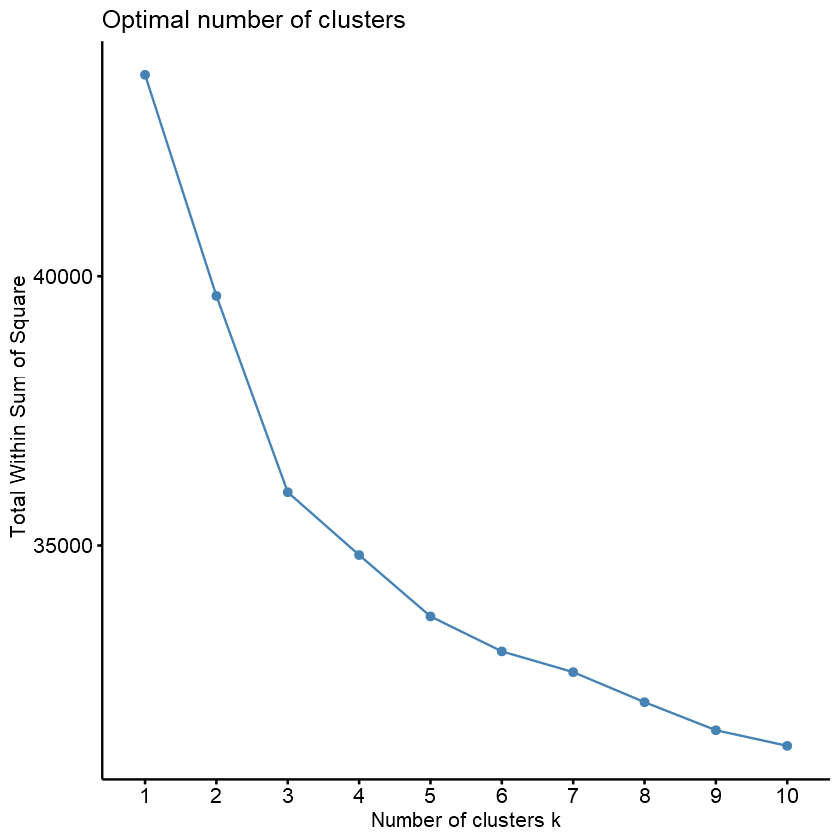

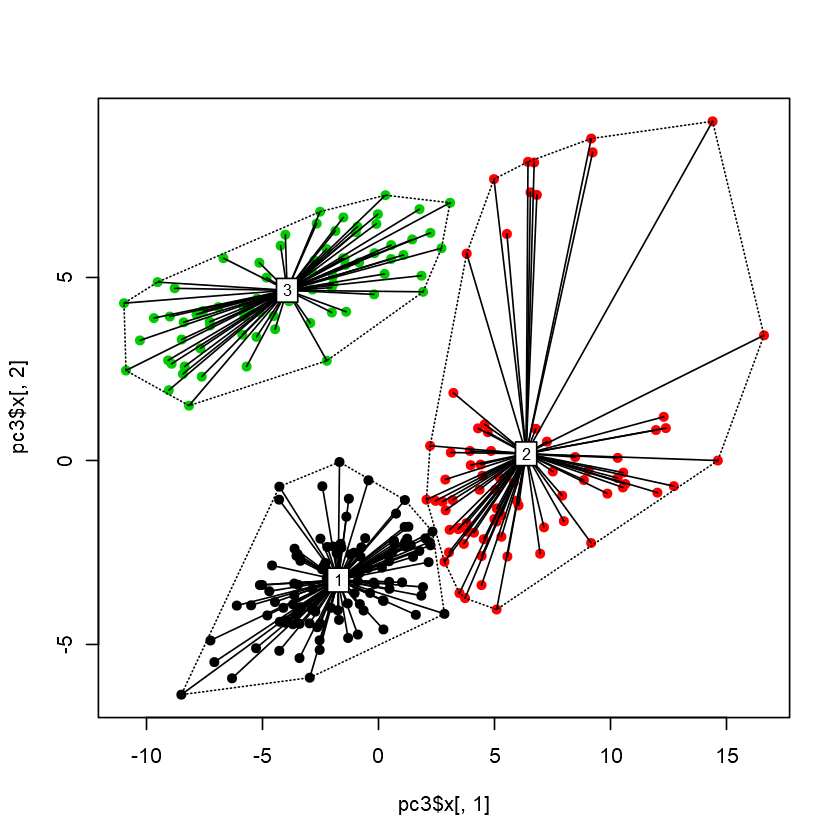

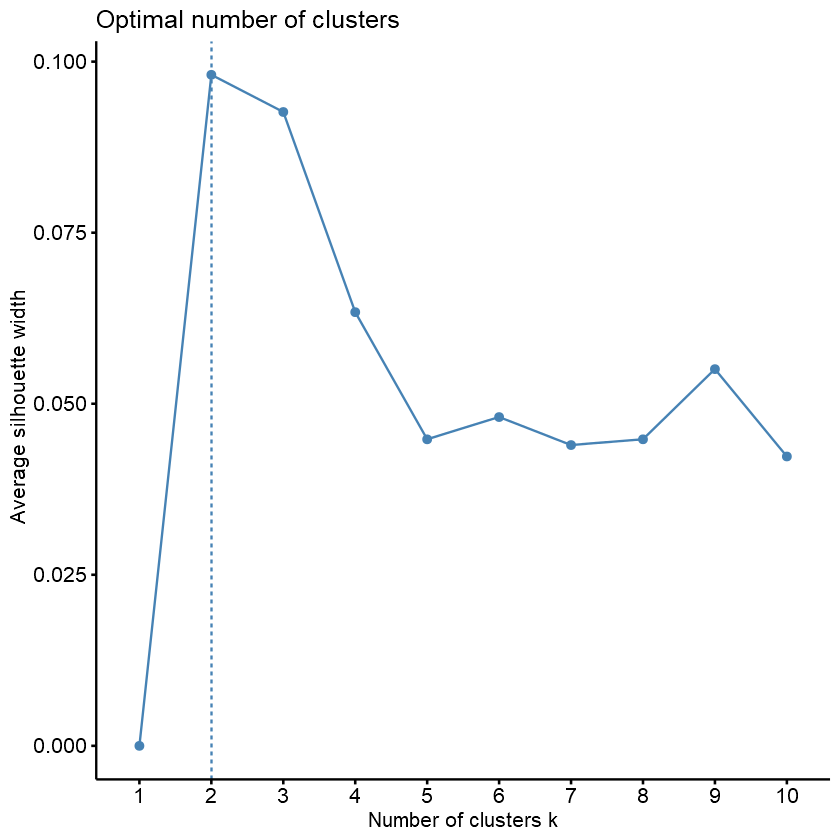

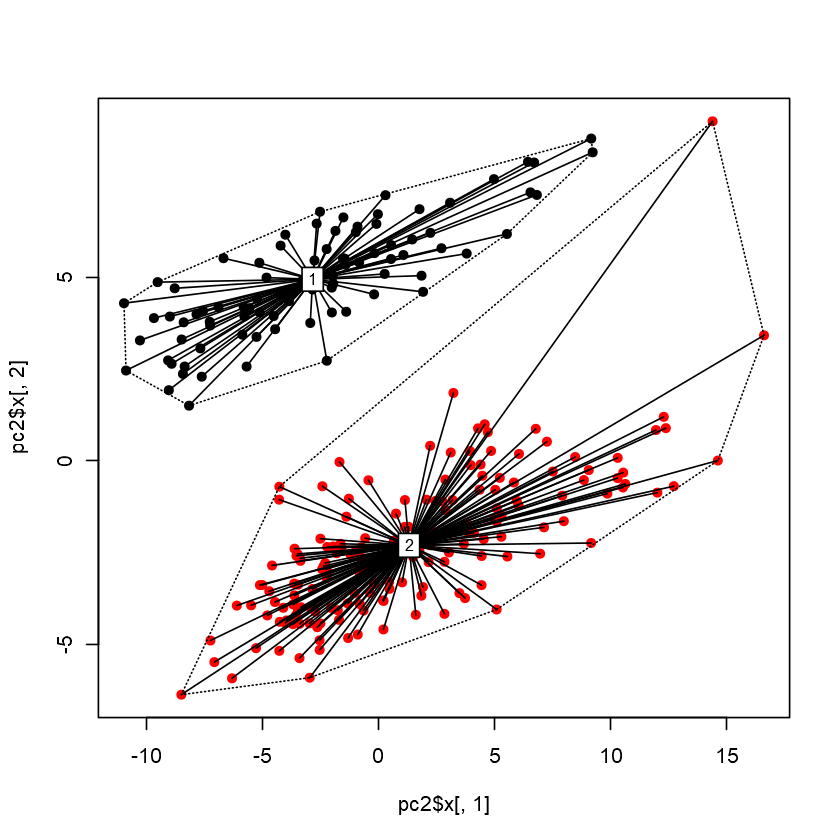

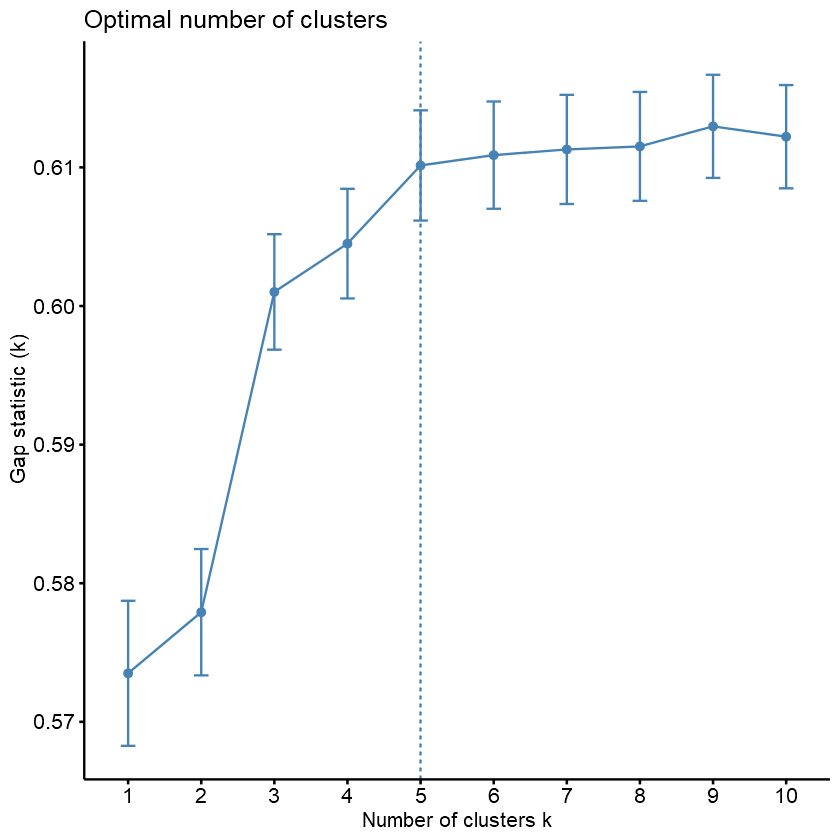

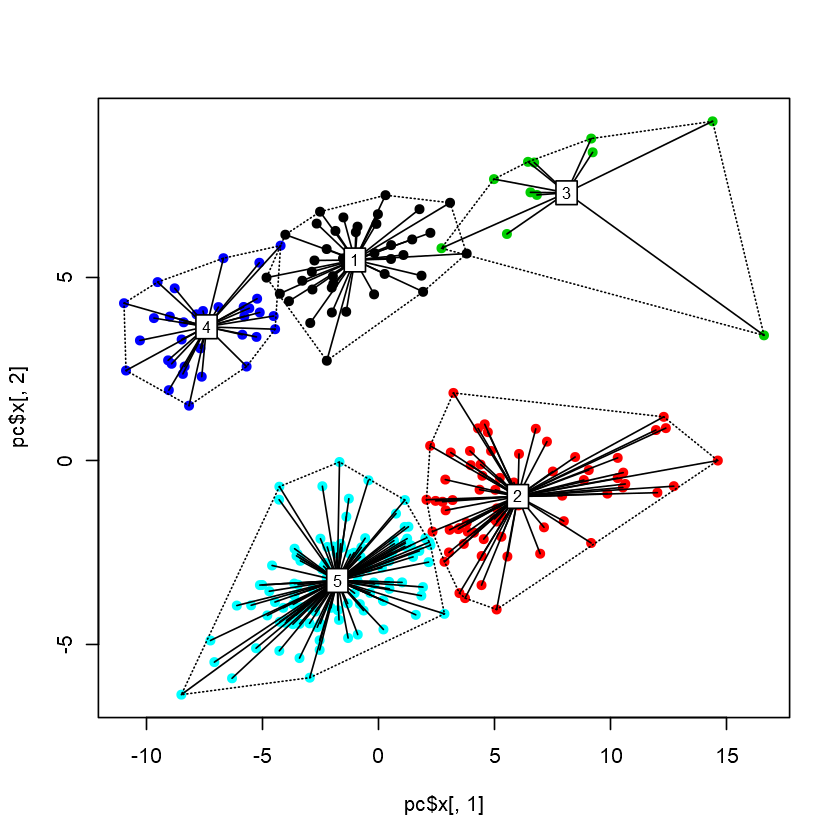

In [11]:
set.seed(123)
fviz_nbclust(mydata, kmeans, method = "wss")
km3 <- kmeans(mydata,3,10000)
pc3<-prcomp(mydata)
plot(pc3$x[,1], pc3$x[,2],col=km3$cluster,pch=16)
pc3<-cbind(pc3$x[,1], pc3$x[,2])
ordispider(pc3, factor(km3$cluster), label = TRUE)
ordihull(pc3, factor(km3$cluster), lty = "dotted")

fviz_nbclust(mydata, kmeans, method = "silhouette")
km2 <- kmeans(mydata,2,10000)
pc2<-prcomp(mydata)
plot(pc2$x[,1], pc2$x[,2],col=km2$cluster,pch=16)
pc2<-cbind(pc2$x[,1], pc2$x[,2])
ordispider(pc2, factor(km2$cluster), label = TRUE)
ordihull(pc2, factor(km2$cluster), lty = "dotted")


set.seed(123)
gap_stat <- clusGap(mydata, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
fviz_gap_stat(gap_stat)
km5 <- kmeans(mydata,5,10000)

pc<-prcomp(mydata)
plot(pc$x[,1], pc$x[,2],col=km5$cluster,pch=16)
pc<-cbind(pc$x[,1], pc$x[,2])
ordispider(pc, factor(km5$cluster), label = TRUE)
ordihull(pc, factor(km5$cluster), lty = "dotted")

In [7]:
# Write the labels of the new clusters
# t(km$cluster)
# write.table(data.frame(t(km$cluster)),"km_cluster.txt",sep='\t')

In [ ]:
# We need to insert the new clusters into the metabolomics data. The format looks like below:

#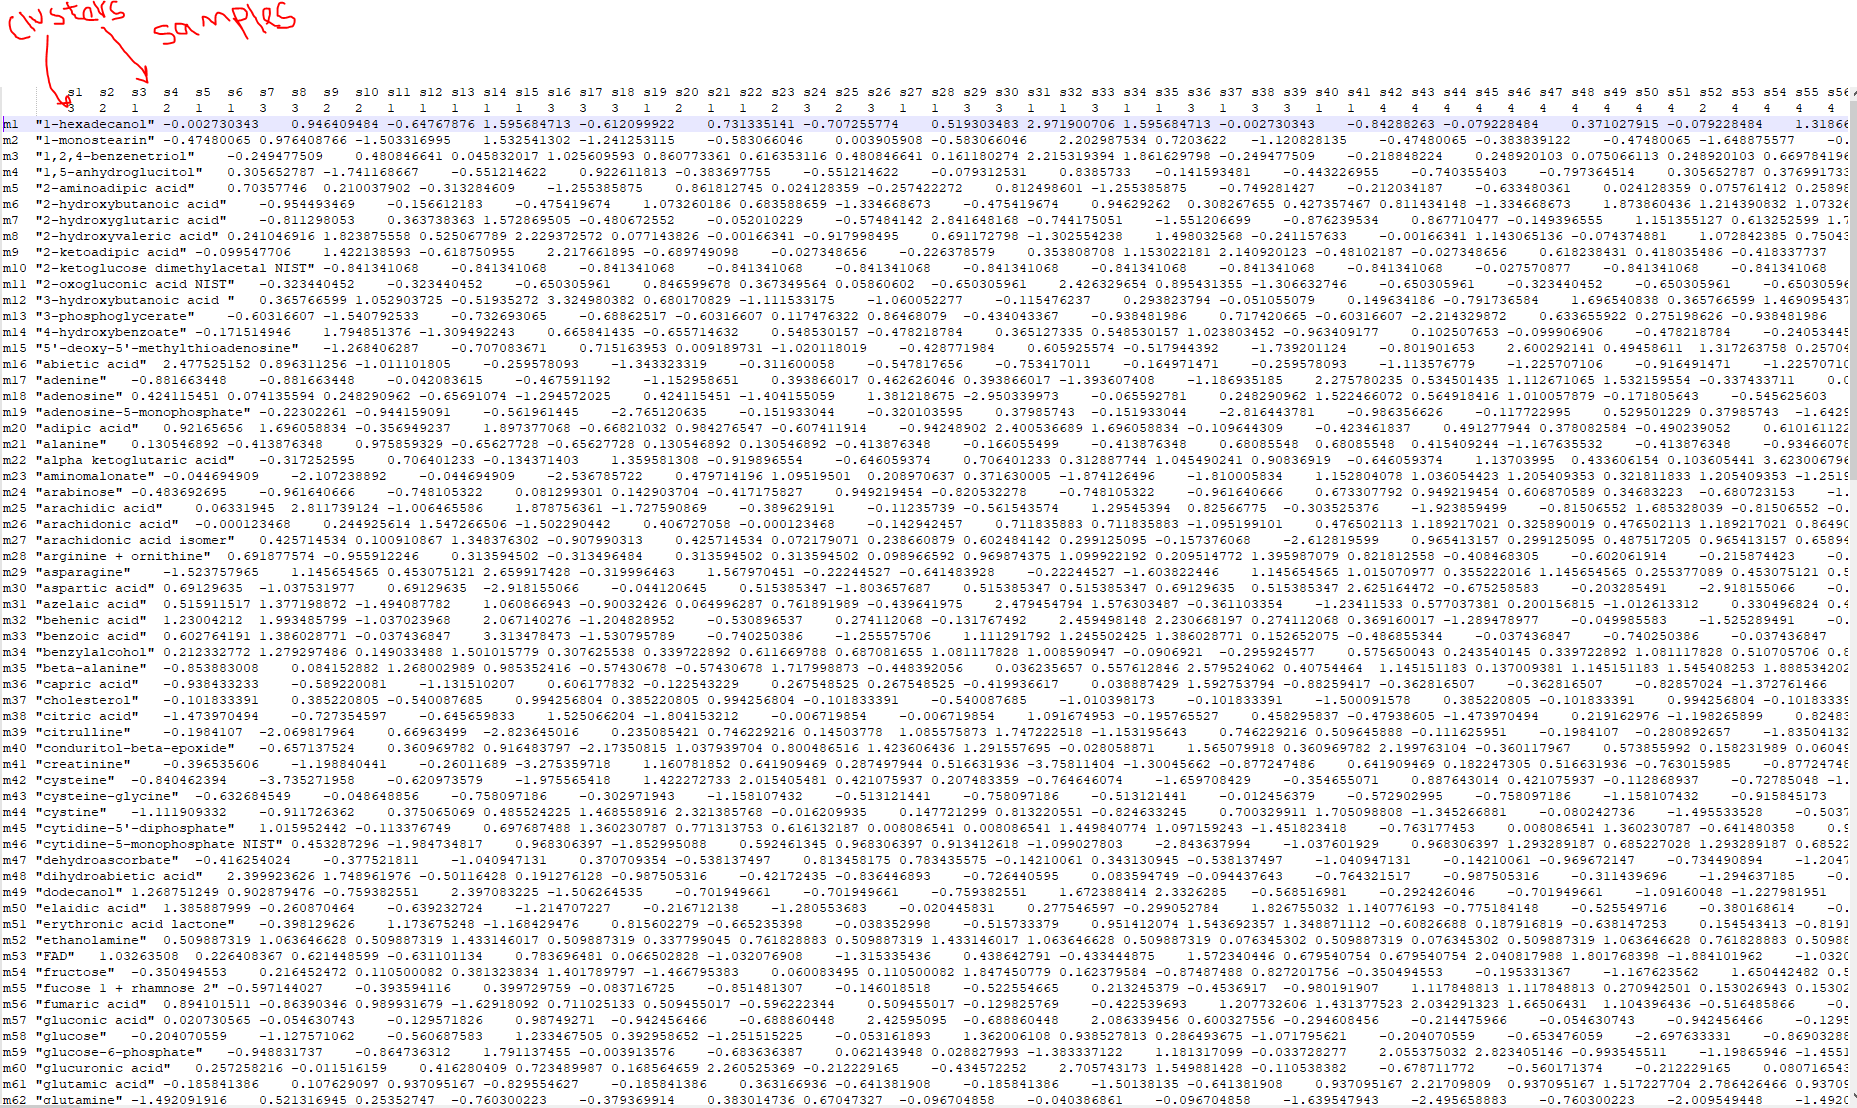

In [18]:
# Step 3: we will identify metabolites that segergate the four clusters using SAM algorithm

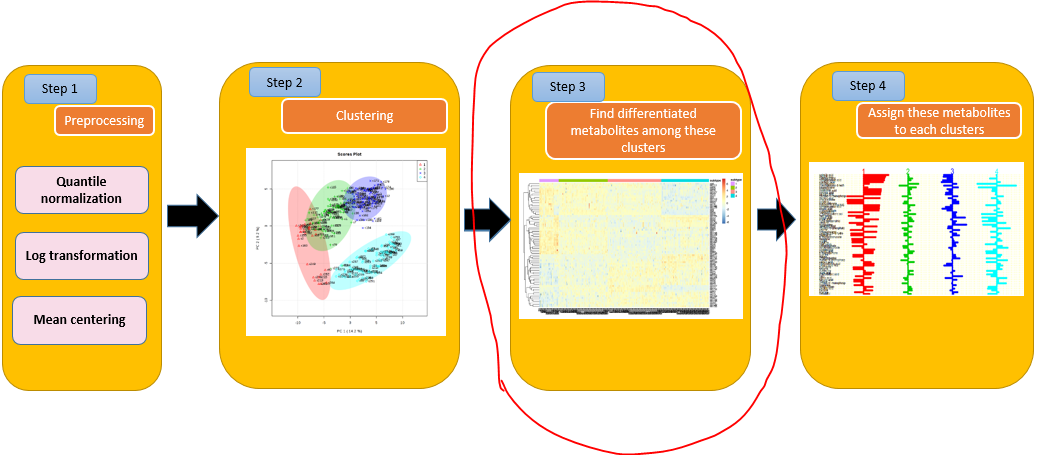

In [12]:
#https://www.bioconductor.org/packages/release/bioc/vignettes/siggenes/inst/doc/siggenes.pdf
#source("https://bioconductor.org/biocLite.R")
#biocLite("siggenes")
library(siggenes)
library(pamr)

In [13]:
#create the data to be used by SAM and PAM
#Make sure you will get 162 metabolites and 271 samples 
#khan.data <- pamr.from.excel("ER_new_labels_123.txt", 273, sample.labels=TRUE)
khan.data=list()
khan.data$x=t(mydata)
khan.data$y=as.character(t(km$cluster))
khan.data$genenames=colnames(mydata)
khan.data$geneid=colnames(mydata)
khan.data$samplelabels=rownames(mydata)
khan.data

$x
                                   ERn_train_1 ERn_train_2  ERn_train_3
1-hexadecanol                     -0.002730343  0.94640948 -0.647678760
1-monostearin                     -0.474800650  0.97640877 -1.503316995
1,2,4-benzenetriol                -0.249477509  0.48084664  0.045832017
1,5-anhydroglucitol                0.305652787 -1.74116867 -0.551214622
2-aminoadipic acid                 0.703577460  0.21003790 -0.313284609
2-hydroxybutanoic acid            -0.954493469 -0.15661218 -0.475419674
2-hydroxyglutaric acid            -0.811298053  0.36373836  1.572869505
2-hydroxyvaleric acid              0.241046916  1.82387556  0.525067789
2-ketoadipic acid                 -0.099547706  1.42213859 -0.618750955
2-ketoglucose dimethylacetal NIST -0.841341068 -0.84134107 -0.841341068
2-oxogluconic acid NIST           -0.323440452 -0.32344045 -0.650305961
3-hydroxybutanoic acid             0.365766599  1.05290372 -0.519352720
3-phosphoglycerate                -0.603166070 -1.54079253 -0.732693065
4-hydroxybenzoate                 -0.171514946  1.79485138 -1.309492243
5'-deoxy-5'-methylthioadenosine   -1.268406287 -0.70708367  0.715163953
abietic acid                       2.477525152  0.89631126 -1.011101805
adenine                           -0.881663448 -0.88166345 -0.042083615
adenosine                          0.424115451  0.07413559  0.248290962
adenosine-5-monophosphate         -0.223022610 -0.94415909 -0.561961445
adipic acid                        0.921656560  1.69605883 -0.356949237
alanine                            0.130546892 -0.41387635  0.975859329
alpha ketoglutaric acid           -0.317252595  0.70640123 -0.134371403
aminomalonate                     -0.044694909 -2.10723889 -0.044694909
arabinose                         -0.483692695 -0.96164067 -0.748105322
arachidic acid                     0.063319450  2.81173912 -1.006465586
arachidonic acid                  -0.000123468  0.24492561  1.547266506
arachidonic acid isomer            0.425714534  0.10091087  1.348376302
arginine + ornithine               0.691877574 -0.95591225  0.313594502
asparagine                        -1.523757965  1.14565457  0.453075121
aspartic acid                      0.691296350 -1.03753198  0.691296350
azelaic acid                       0.515911517  1.37719887 -1.494087782
behenic acid                       1.230042120  1.99348580 -1.037023968
benzoic acid                       0.602764191  1.38602877 -0.037436847
benzylalcohol                      0.212332772  1.27929749  0.149033488
beta-alanine                      -0.853883008  0.08415288  1.268002989
capric acid                       -0.938433233 -0.58922008 -1.131510207
cholesterol                       -0.101833391  0.38522080 -0.540087685
citric acid                       -1.473970494 -0.72735460 -0.645659833
citrulline                        -0.198410700 -2.06981796  0.669634990
conduritol-beta-epoxide           -0.657137524  0.36096978  0.916483797
creatinine                        -0.396535606 -1.19884044 -0.260116890
cysteine                          -0.840462394 -3.73527196 -0.620973579
cysteine-glycine                  -0.632684549 -0.04864886 -0.758097186
cystine                           -1.111909332 -0.91172636  0.375065069
cytidine-5'-diphosphate            1.015952442 -0.11337675  0.697687488
cytidine-5-monophosphate NIST      0.453287296 -1.98473482  0.968306397
dehydroascorbate                  -0.416254024 -0.37752181 -1.040947131
dihydroabietic acid                2.399923626  1.74896198 -0.501164280
dodecanol                          1.268751249  0.90287948 -0.759382551
elaidic acid                       1.385887999 -0.26087046 -0.639232724
erythronic acid lactone           -0.398129626  1.17367525 -1.168429476
ethanolamine                       0.509887319  1.06364663  0.509887319
FAD                                1.032635080  0.22640837  0.621448599
fructose                          -0.350494553  0.21645247  0.110500082
fucose 1 + rhamnose 2             -0.

In [43]:
# khan.data1 <- pamr.from.excel("ER_new_labels_123.txt", 273, sample.labels=TRUE)
# khan.data1

In [14]:
sam.out <- sam(khan.data$x, khan.data$y, rand = 123, gene.names = khan.data$genenames)
sam.out

SAM Analysis for the Multi-Class Case with 4 Classes 
 
   Delta    p0  False Called    FDR
1    0.1 0.069 123.87    161 0.0531
2    5.6 0.069      0     91      0
3   11.1 0.069      0     62      0
4   16.6 0.069      0     41      0
5   22.2 0.069      0     18      0
6   27.7 0.069      0     13      0
7   33.2 0.069      0      6      0
8   38.7 0.069      0      5      0
9   44.2 0.069      0      2      0
10  49.7 0.069      0      2      0

In [ ]:
# We will Delta =5.6 as the FDR = 0. Using this Delta, we recover 91 metabolites 

In [15]:
length(list.siggenes(sam.out, 5.6))
list.siggenes(sam.out, 5.6)

[1] 91

[1] "benzylalcohol"                     "2-ketoglucose dimethylacetal NIST"
 [3] "ethanolamine"                      "ribonic acid"                     
 [5] "homoserine"                        "palmitic acid"                    
 [7] "2-hydroxyvaleric acid"             "arachidic acid"                   
 [9] "hydroxylamine"                     "heptadecanoic acid"               
[11] "myristic acid"                     "propane-1,3-diol NIST"            
[13] "1,2,4-benzenetriol"                "ribulose-5-phosphate"             
[15] "stearic acid"                      "cytidine-5-monophosphate NIST"    
[17] "cysteine"                          "capric acid"                      
[19] "dodecanol"                         "aminomalonate"                    
[21] "glycolic acid"                     "adipic acid"                      
[23] "ornithine"                         "salicylic acid"                   
[25] "benzoic acid"                      "behenic acid"                     
[27] "FAD"                               "p-hydroquinone"                   
[29] "hypoxanthine"                      "azelaic acid"                     
[31] "oxalic acid"                       "O-acetylserine"                   
[33] "pelargonic acid"                   "methionine"                       
[35] "inositol-4-monophosphate"          "pimaric acid NIST"                
[37] "dehydroascorbate"                  "pentadecanoic acid"               
[39] "2-ketoadipic acid"                 "1-monostearin"                    
[41] "glycine"                           "oxoproline"                       
[43] "lignoceric acid"                   "putrescine"                       
[45] "1-hexadecanol"                     "pyrophosphate"                    
[47] "pyrazine 2,5-dihydroxy  NIST"      "uridine-5'-monophosphate"         
[49] "phenylalanine"                     "levoglucosan"                     
[51] "4-hydroxybenzoate"                 "adenosine-5-monophosphate"        
[53] "glyceric acid"                     "pyrogallol"                       
[55] "palmitic acid butyl ester NIST"    "guanine"                          
[57] "dihydroabietic acid"               "ribose-5-phosphate"               
[59] "adenine"                           "uridine"                          
[61] "taurine"                           "citrulline"                       
[63] "5'-deoxy-5'-methylthioadenosine"   "malate"                           
[65] "glycerol"                          "inosine 5'-monophosphate"         
[67] "abietic acid"                      "fumaric acid"                     
[69] "glutamic acid"                     "hydroxycarbamate NIST"            
[71] "tyrosine"                          "octadecanol"                      
[73] "threonine"                         "lauric acid"                      
[75] "glycerol-alpha-phosphate"          "2-hydroxybutanoic acid"           
[77] "uracil"                            "inositol myo-"                    
[79] "glutamine"                         "sucrose"                          
[81] "isothreonic acid"                  "tryptophan"                       
[83] "threitol"                          "creatinine"                       
[85] "methanolphosphate"                 "icosenoic acid"                   
[87] "guanosine"                         "phosphoric acid"                  
[89] "monopalmitin-1-glyceride"          "aspartic acid"                    
[91] "palmitoleic acid"

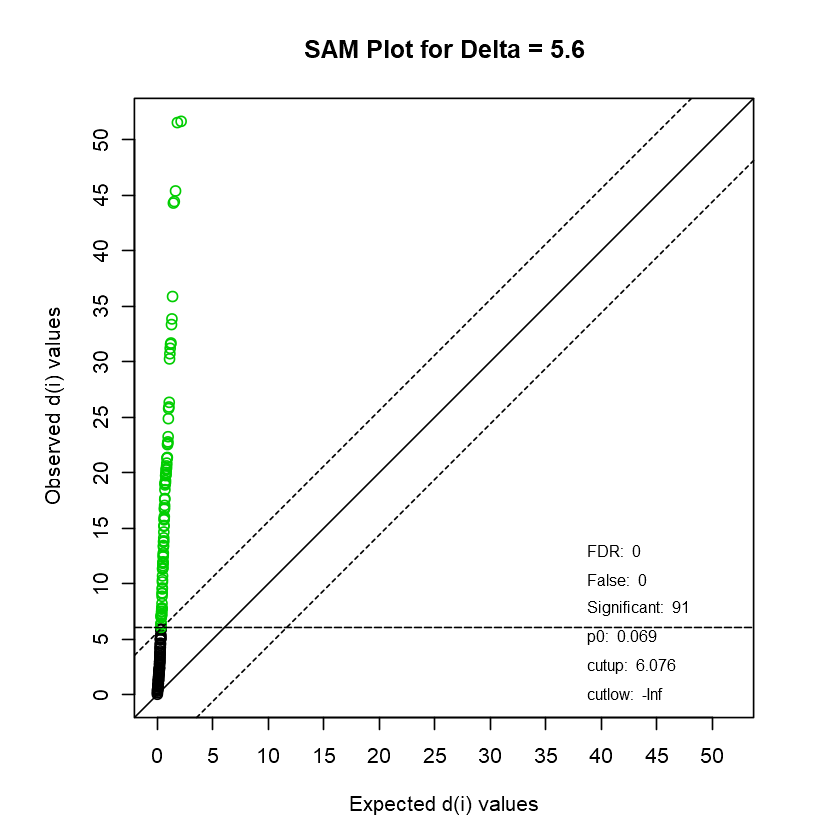

In [16]:
plot(sam.out, 5.6)

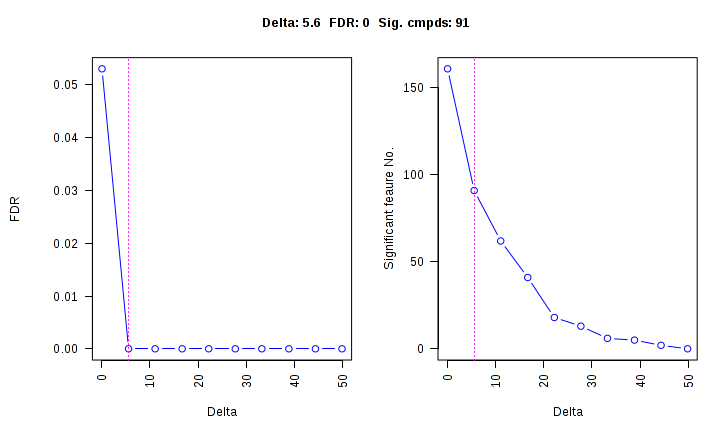

In [17]:
sum.sam.out <- summary(sam.out, 5.6)
sum.sam.out

SAM Analysis for the Multi-Class Case with 4 Classes 
 
s0 = 1.0101  (The 100 % quantile of the s values.) 
 
 Number of permutations: 100  

 MEAN number of falsely called variables is computed.

Delta: 5.6
cutlow: -Inf
cutup: 6.076
p0: 0.069
Identified Genes: 91
Falsely Called Genes: 0
FDR: 0


Identified Genes (using Delta = 5.6):

   Row d.value stdev rawp q.value R.fold                              Name
1   34   51.66 0.269    0       0     NA                     benzylalcohol
2   10   51.55 0.270    0       0     NA 2-ketoglucose dimethylacetal NIST
3   52   45.39 0.329    0       0     NA                      ethanolamine
4  134   44.43 0.338    0       0     NA                      ribonic acid
5   73   44.30 0.340    0       0     NA                        homoserine
6  114   35.88 0.430    0       0     NA                     palmitic acid
7    8   33.86 0.454    0       0     NA             2-hydroxyvaleric acid
8   25   33.35 0.460    0       0     NA                    ara

In [ ]:
## plot heatmap significant metabolites selected by SAM 

[1] 271  94

benzylalcohol 2-ketoglucose dimethylacetal NIST ethanolamine
ERn_train_3   0.1490335    -0.8413411                        0.5098873   
ERn_train_5   0.3076255    -0.8413411                        0.5098873   
ERn_train_6   0.3397229    -0.8413411                        0.3377990   
ERn_train_11 -0.0906921    -0.8413411                        0.5098873   
ERn_train_12 -0.2959246    -0.8413411                        0.0763453   
ERn_train_13  0.5756500    -0.8413411                        0.5098873   
             ribonic acid homoserine palmitic acid 2-hydroxyvaleric acid
ERn_train_3  0.91367640    0.1232998 -1.1404873     0.52506779          
ERn_train_5  0.58630757   -0.1041692 -0.8662086     0.07714383          
ERn_train_6  0.08571971    0.4387293 -1.0007683    -0.00166341          
ERn_train_11 0.94749327    2.4264900  0.2191135    -0.24115763          
ERn_train_12 0.91367640    1.2435899 -1.6147825    -0.00166341          
ERn_train_13 0.11683140    1.5529604 -1.5002997     1.14306514          
             arachidic acid hydroxylamine heptadecanoic acid ...
ERn_train_3  -1.0064656     -0.2946867    -1.6094555         ...
ERn_train_5  -1.7275909     -1.1608398    -1.4178919         ...
ERn_train_6  -0.3896292     -0.5397328    -0.5325669         ...
ERn_train_11 -0.3035254     -0.8281115     0.1227052         ...
ERn_train_12 -1.9238595     -2.4673166    -1.4178919         ...
ERn_train_13 -0.8150655     -1.2742167    -1.1489462         ...
             methanolphosphate icosenoic acid guanosine  phosphoric acid
ERn_train_3   0.28460366       -1.4455264      0.9607857  0.7247352     
ERn_train_5   0.28460366       -0.6163376     -0.1513432 -0.3564427     
ERn_train_6   1.09464728        0.8778117      0.4581091  0.7247352     
ERn_train_11 -0.06124372       -1.8341365      0.7952595 -1.2395799     
ERn_train_12  1.25507618        0.2650231      1.0784938 -0.3564427     
ERn_train_13  0.87135547        0.3222200      0.2996513 -0.3564427     
             monopalmitin-1-glyceride aspartic acid palmitoleic acid ER 
ERn_train_3   0.4925084                0.69129635   -0.69365809      NEG
ERn_train_5  -1.3919355               -0.04412065   -0.73227322      NEG
ERn_train_6  -1.0158961                0.51538535   -0.77699145      NEG
ERn_train_11  0.1867572                0.51538535   -0.04811886      NEG
ERn_train_12 -0.4425309                2.62516447   -1.22530388      NEG
ERn_train_13 -0.4425309               -0.67525858   -0.33314135      NEG
             new_label sample_id   
ERn_train_3  1         ERn_train_3 
ERn_train_5  1         ERn_train_5 
ERn_train_6  1         ERn_train_6 
ERn_train_11 1         ERn_train_11
ERn_train_12 1         ERn_train_12
ERn_train_13 1         ERn_train_13

benzylalcohol 2-ketoglucose dimethylacetal NIST ethanolamine
ERn_train_3   0.1490335    -0.8413411                        0.5098873   
ERn_train_5   0.3076255    -0.8413411                        0.5098873   
ERn_train_6   0.3397229    -0.8413411                        0.3377990   
ERn_train_11 -0.0906921    -0.8413411                        0.5098873   
ERn_train_12 -0.2959246    -0.8413411                        0.0763453   
ERn_train_13  0.5756500    -0.8413411                        0.5098873   
             ribonic acid homoserine palmitic acid 2-hydroxyvaleric acid
ERn_train_3  0.91367640    0.1232998 -1.1404873     0.52506779          
ERn_train_5  0.58630757   -0.1041692 -0.8662086     0.07714383          
ERn_train_6  0.08571971    0.4387293 -1.0007683    -0.00166341          
ERn_train_11 0.94749327    2.4264900  0.2191135    -0.24115763          
ERn_train_12 0.91367640    1.2435899 -1.6147825    -0.00166341          
ERn_train_13 0.11683140    1.5529604 -1.5002997     1.14306514          
             arachidic acid hydroxylamine heptadecanoic acid ... tryptophan
ERn_train_3  -1.0064656     -0.2946867    -1.6094555         ... -0.6701237
ERn_train_5  -1.7275909     -1.1608398    -1.4178919         ... -0.3856378
ERn_train_6  -0.3896292     -0.5397328    -0.5325669         ... -0.5276051
ERn_train_11 -0.3035254     -0.8281115     0.1227052         ... -0.3164163
ERn_train_12 -1.9238595     -2.4673166    -1.4178919         ... -0.2444957
ERn_train_13 -0.8150655     -1.2742167    -1.1489462         ... -0.3164163
             threitol   creatinine methanolphosphate icosenoic acid guanosine 
ERn_train_3  -0.4185724 -0.2601169  0.28460366       -1.4455264      0.9607857
ERn_train_5  -0.1259419  1.1607819  0.28460366       -0.6163376     -0.1513432
ERn_train_6   0.7357211  0.6419095  1.09464728        0.8778117      0.4581091
ERn_train_11 -0.1917944 -0.8772475 -0.06124372       -1.8341365      0.7952595
ERn_train_12  0.5610633  0.6419095  1.25507618        0.2650231      1.0784938
ERn_train_13  0.2970000  0.1822473  0.87135547        0.3222200      0.2996513
             phosphoric acid monopalmitin-1-glyceride aspartic acid
ERn_train_3   0.7247352       0.4925084                0.69129635  
ERn_train_5  -0.3564427      -1.3919355               -0.04412065  
ERn_train_6   0.7247352      -1.0158961                0.51538535  
ERn_train_11 -1.2395799       0.1867572                0.51538535  
ERn_train_12 -0.3564427      -0.4425309                2.62516447  
ERn_train_13 -0.3564427      -0.4425309               -0.67525858  
             palmitoleic acid
ERn_train_3  -0.69365809     
ERn_train_5  -0.73227322     
ERn_train_6  -0.77699145     
ERn_train_11 -0.04811886     
ERn_train_12 -1.22530388     
ERn_train_13 -0.33314135

[1] 271  91

[1] "data.frame"

cluster
ERn_train_3  1      
ERn_train_5  1      
ERn_train_6  1      
ERn_train_11 1      
ERn_train_12 1      
ERn_train_13 1

[1] 271   1

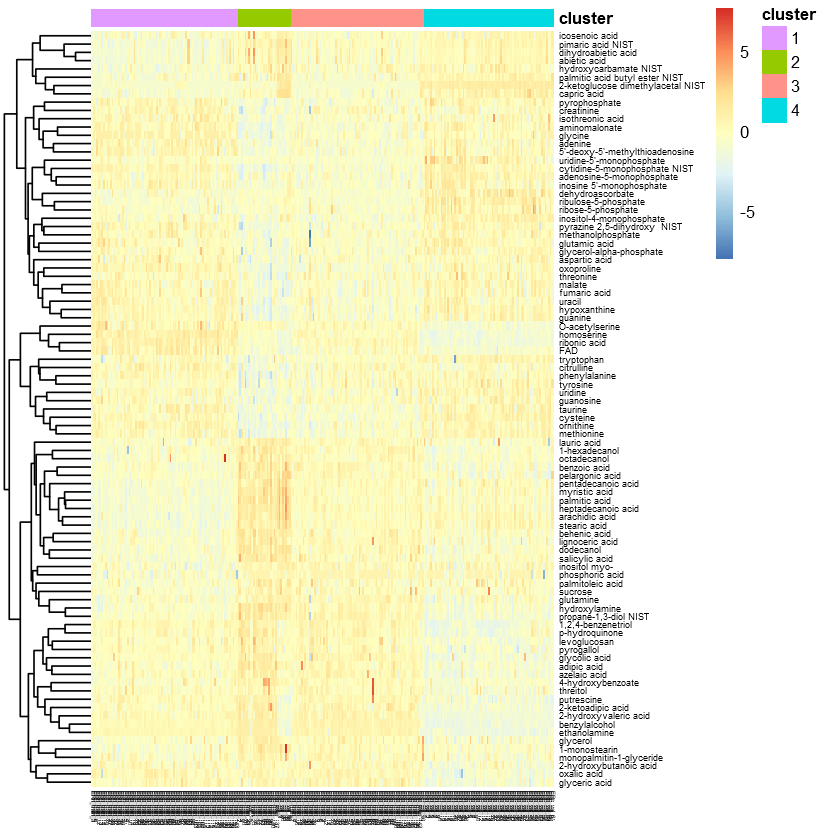

In [22]:
my_sam_meta=select(mydata,(list.siggenes(sam.out,5.6))) %>% 
mutate(ER=prostate_df$Label,new_label=km$cluster,sample_id=row.names(prostate_df)) %>%
arrange(new_label)
dim(my_sam_meta)
rownames(my_sam_meta)=my_sam_meta[,'sample_id']

head(my_sam_meta)

sam_data_pheatmap=(((my_sam_meta[,1:(ncol(my_sam_meta)-3)])))
head(sam_data_pheatmap)
dim(sam_data_pheatmap)
class(sam_data_pheatmap)

#annotation_sam_pheatmap=data.frame(er=factor(my_sam_meta$ER),new_label=factor(my_sam_meta$new_label))
annotation_sam_pheatmap=data.frame(cluster=factor(my_sam_meta$new_label))
rownames(annotation_sam_pheatmap)=rownames(my_sam_meta)
head(annotation_sam_pheatmap)
dim(annotation_sam_pheatmap)

pheatmap(as.matrix(t(sam_data_pheatmap)),annotation=annotation_sam_pheatmap,cluster_cols=F,fontsize_row=5,fontsize_col=3,
        filename="4b")

In [42]:
my_sam_meta=select(mydata,(list.siggenes(sam.out,5.6))) %>% 
mutate(ER=prostate_df$Label,new_label=km$cluster,sample_id=row.names(prostate_df)) %>%
arrange(new_label)
dim(my_sam_meta)
rownames(my_sam_meta)=my_sam_meta[,'sample_id']

head(my_sam_meta)

sam_data_pheatmap=(((my_sam_meta[,1:(ncol(my_sam_meta)-3)])))
head(sam_data_pheatmap)
dim(sam_data_pheatmap)
class(sam_data_pheatmap)

#annotation_sam_pheatmap=data.frame(er=factor(my_sam_meta$ER),new_label=factor(my_sam_meta$new_label))
annotation_sam_pheatmap=data.frame(cluster=factor(my_sam_meta$new_label))
rownames(annotation_sam_pheatmap)=rownames(my_sam_meta)
head(annotation_sam_pheatmap)
dim(annotation_sam_pheatmap)

pheatmap(as.matrix(t(sam_data_pheatmap)),annotation=annotation_sam_pheatmap,cluster_cols=F,fontsize_row=5,fontsize_col=3,
        show_colnames=F,filename="4b.pdf")

[1] 271  94

benzylalcohol 2-ketoglucose dimethylacetal NIST ethanolamine ribonic acid homoserine palmitic acid 2-hydroxyvaleric acid arachidic acid hydroxylamine heptadecanoic acid ... methanolphosphate icosenoic acid guanosine  phosphoric acid monopalmitin-1-glyceride aspartic acid palmitoleic acid ER  new_label sample_id   
ERn_train_3   0.1490335    -0.8413411                        0.5098873    0.91367640    0.1232998 -1.1404873     0.52506779           -1.0064656     -0.2946867    -1.6094555         ...  0.28460366       -1.4455264      0.9607857  0.7247352       0.4925084                0.69129635   -0.69365809      NEG 1         ERn_train_3 
ERn_train_5   0.3076255    -0.8413411                        0.5098873    0.58630757   -0.1041692 -0.8662086     0.07714383           -1.7275909     -1.1608398    -1.4178919         ...  0.28460366       -0.6163376     -0.1513432 -0.3564427      -1.3919355               -0.04412065   -0.73227322      NEG 1         ERn_train_5 
ERn_train_6   0.3397229    -0.8413411                        0.3377990    0.08571971    0.4387293 -1.0007683    -0.00166341           -0.3896292     -0.5397328    -0.5325669         ...  1.09464728        0.8778117      0.4581091  0.7247352      -1.0158961                0.51538535   -0.77699145      NEG 1         ERn_train_6 
ERn_train_11 -0.0906921    -0.8413411                        0.5098873    0.94749327    2.4264900  0.2191135    -0.24115763           -0.3035254     -0.8281115     0.1227052         ... -0.06124372       -1.8341365      0.7952595 -1.2395799       0.1867572                0.51538535   -0.04811886      NEG 1         ERn_train_11
ERn_train_12 -0.2959246    -0.8413411                        0.0763453    0.91367640    1.2435899 -1.6147825    -0.00166341           -1.9238595     -2.4673166    -1.4178919         ...  1.25507618        0.2650231      1.0784938 -0.3564427      -0.4425309                2.62516447   -1.22530388      NEG 1         ERn_train_12
ERn_train_13  0.5756500    -0.8413411                        0.5098873    0.11683140    1.5529604 -1.5002997     1.14306514           -0.8150655     -1.2742167    -1.1489462         ...  0.87135547        0.3222200      0.2996513 -0.3564427      -0.4425309               -0.67525858   -0.33314135      NEG 1         ERn_train_13

benzylalcohol 2-ketoglucose dimethylacetal NIST ethanolamine ribonic acid homoserine palmitic acid 2-hydroxyvaleric acid arachidic acid hydroxylamine heptadecanoic acid ... tryptophan threitol   creatinine methanolphosphate icosenoic acid guanosine  phosphoric acid monopalmitin-1-glyceride aspartic acid palmitoleic acid
ERn_train_3   0.1490335    -0.8413411                        0.5098873    0.91367640    0.1232998 -1.1404873     0.52506779           -1.0064656     -0.2946867    -1.6094555         ... -0.6701237 -0.4185724 -0.2601169  0.28460366       -1.4455264      0.9607857  0.7247352       0.4925084                0.69129635   -0.69365809     
ERn_train_5   0.3076255    -0.8413411                        0.5098873    0.58630757   -0.1041692 -0.8662086     0.07714383           -1.7275909     -1.1608398    -1.4178919         ... -0.3856378 -0.1259419  1.1607819  0.28460366       -0.6163376     -0.1513432 -0.3564427      -1.3919355               -0.04412065   -0.73227322     
ERn_train_6   0.3397229    -0.8413411                        0.3377990    0.08571971    0.4387293 -1.0007683    -0.00166341           -0.3896292     -0.5397328    -0.5325669         ... -0.5276051  0.7357211  0.6419095  1.09464728        0.8778117      0.4581091  0.7247352      -1.0158961                0.51538535   -0.77699145     
ERn_train_11 -0.0906921    -0.8413411                        0.5098873    0.94749327    2.4264900  0.2191135    -0.24115763           -0.3035254     -0.8281115     0.1227052         ... -0.3164163 -0.1917944 -0.8772475 -0.06124372       -1.8341365      0.7952595 -1.2395799       0.1867572                0.51538535   -0.04811886     
ERn_train_12 -0.2959246    -0.8413411                        0.0763453    0.91367640    1.2435899 -1.6147825    -0.00166341           -1.9238595     -2.4673166    -1.4178919         ... -0.2444957  0.5610633  0.6419095  1.25507618        0.2650231      1.0784938 -0.3564427      -0.4425309                2.62516447   -1.22530388     
ERn_train_13  0.5756500    -0.8413411                        0.5098873    0.11683140    1.5529604 -1.5002997     1.14306514           -0.8150655     -1.2742167    -1.1489462         ... -0.3164163  0.2970000  0.1822473  0.87135547        0.3222200      0.2996513 -0.3564427      -0.4425309               -0.67525858   -0.33314135

[1] 271  91

[1] "data.frame"

cluster
ERn_train_3  1      
ERn_train_5  1      
ERn_train_6  1      
ERn_train_11 1      
ERn_train_12 1      
ERn_train_13 1

[1] 271   1

In [ ]:
# Step4 : we will assign the 91 metabolites to the produced 4 clusters using PAM algorithm 

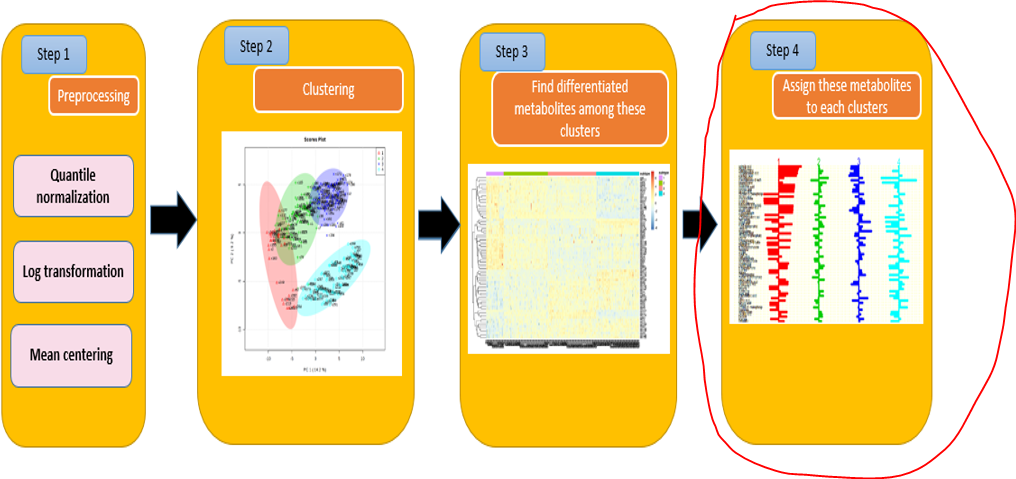

In [13]:
#install.packages("pamr")
library(pamr)

In [23]:
# Update khan data with only 91 metabolites
index= match(colnames(sam_data_pheatmap),khan.data$genenames)
index

[1]  34  10  52 134  73 114   8  25  75  72 102 127   3 137 142  46  42  36  49
[20]  23  69  20 110 138  33  32  53 113  76  31 111 107 118 100  81 125  47 119
[39]   9   2  68 112  91 129   1 132 130 160 120  90  14  19  64 131 115  70  48
[58] 136  17 159 145  39  15  95  65  80  16  56  61  74 155 108 148  88  66   6
[77] 156  83  62 144  86 154 146  41  99  77  71 123 101  30 116

In [24]:
# Update khan data with only 91 metabolites 
khan.data91=list()
khan.data91$x=khan.data$x[index,]
khan.data91$y=khan.data$y
khan.data91$genenames=khan.data$genenames[index]
khan.data91$geneid=khan.data$geneid[index]
khan.data91$samplelabels=khan.data$samplelabels
khan.data91

$x
                                   ERn_train_1 ERn_train_2 ERn_train_3
benzylalcohol                      0.212332772  1.27929749  0.14903349
2-ketoglucose dimethylacetal NIST -0.841341068 -0.84134107 -0.84134107
ethanolamine                       0.509887319  1.06364663  0.50988732
ribonic acid                       1.415936721 -0.85650556  0.91367640
homoserine                         0.052264953 -0.32613294  0.12329977
palmitic acid                      0.571405281  3.07314115 -1.14048733
2-hydroxyvaleric acid              0.241046916  1.82387556  0.52506779
arachidic acid                     0.063319450  2.81173912 -1.00646559
hydroxylamine                      0.475258713  2.05773440 -0.29468673
heptadecanoic acid                 0.013136053  2.44384650 -1.60945549
myristic acid                     -0.260478419  2.45353095 -1.49243027
propane-1,3-diol NIST             -0.092015998  1.99234161 -0.15697829
1,2,4-benzenetriol                -0.249477509  0.48084664  0.04583202
ribulose-5-phosphate               0.056131608 -0.39319006 -0.63365101
stearic acid                       0.352499816  3.13023260 -1.29160266
cytidine-5-monophosphate NIST      0.453287296 -1.98473482  0.96830640
cysteine                          -0.840462394 -3.73527196 -0.62097358
capric acid                       -0.938433233 -0.58922008 -1.13151021
dodecanol                          1.268751249  0.90287948 -0.75938255
aminomalonate                     -0.044694909 -2.10723889 -0.04469491
glycolic acid                     -0.193049470  0.75104950 -0.19304947
adipic acid                        0.921656560  1.69605883 -0.35694924
ornithine                         -0.510834117 -2.02349494  0.25561169
salicylic acid                    -0.210471888  1.77129950 -1.54865758
benzoic acid                       0.602764191  1.38602877 -0.03743685
behenic acid                       1.230042120  1.99348580 -1.03702397
FAD                                1.032635080  0.22640837  0.62144860
p-hydroquinone                    -0.312201907  1.91409795 -0.82865261
hypoxanthine                       0.400475796 -0.98427156  1.26094176
azelaic acid                       0.515911517  1.37719887 -1.49408778
oxalic acid                        1.247534025  0.54802683  0.86523776
O-acetylserine                     0.096439441  0.58807625  1.32122803
pelargonic acid                    0.826798478  1.75965663 -0.47578541
methionine                        -0.489377596 -2.59408764  0.56689401
inositol-4-monophosphate          -0.993270179  0.09521176 -0.02044635
pimaric acid NIST                  2.031357152  0.46810095 -1.10007925
dehydroascorbate                  -0.416254024 -0.37752181 -1.04094713
pentadecanoic acid                -0.494413406  1.71737988 -1.25188489
2-ketoadipic acid                 -0.099547706  1.42213859 -0.61875095
1-monostearin                     -0.474800650  0.97640877 -1.50331700
glycine                            1.038987779 -2.04482421 -0.19519138
oxoproline                         1.352288372 -1.54689757  0.46600802
lignoceric acid                    1.121922692  1.50503670 -0.94238596
putrescine                         0.209822085  0.58919974 -0.47444600
1-hexadecanol                     -0.002730343  0.94640948 -0.64767876
pyrophosphate                     -1.474885114 -0.96069382  0.68580498
pyrazine 2,5-dihydroxy  NIST      -0.289710986 -1.79173319  1.27032358
uridine-5'-monophosphate           0.031204110 -0.44888277 -0.11688049
phenylalanine                      1.907660746 -2.04062765  1.09895794
levoglucosan                      -0.498883358  0.83088741 -0.18055303
4-hydroxybenzoate                 -0.171514946  1.79485138 -1.30949224
adenosine-5-monophosphate         -0.223022610 -0.94415909 -0.56196145
glyceric acid                      0.689258624 -0.27363873 -0.00780664
pyrogallol                        -0.528166982  0.24494622 -0.27069851
palmitic acid butyl ester NIST     0.726438629  1.56873768 -0.54286391
guanine              

In [133]:
# khan.scales <- pamr.adaptthresh(khan.train91)
# khan.scales
# khan.train3 <- pamr.train(khan.data91, threshold.scale=khan.scales)
# khan.results3 <-  pamr.cv(khan.train3, khan.data91)
#  pamr.plotcv(khan.results3)
# pamr.plotcen(khan.train3, khan.data91, threshold=0.5)
#pamr.makeclasses(khan.data)

In [25]:
# Train the classifier
khan.train91 <- pamr.train(khan.data91)

123456789101112131415161718192021222324252627282930

In [26]:
#Cross-validate the classifier
khan.results91<- pamr.cv(khan.train91, khan.data91)
pamr.cv(khan.train91, data = khan.data91)

1234Fold 1 :123456789101112131415161718192021222324252627282930
Fold 2 :123456789101112131415161718192021222324252627282930
Fold 3 :123456789101112131415161718192021222324252627282930
Fold 4 :123456789101112131415161718192021222324252627282930
Fold 5 :123456789101112131415161718192021222324252627282930
Fold 6 :123456789101112131415161718192021222324252627282930
Fold 7 :123456789101112131415161718192021222324252627282930
Fold 8 :123456789101112131415161718192021222324252627282930
Fold 9 :123456789101112131415161718192021222324252627282930
Fold 10 :123456789101112131415161718192021222324252627282930
1234Fold 1 :123456789101112131415161718192021222324252627282930
Fold 2 :123456789101112131415161718192021222324252627282930
Fold 3 :123456789101112131415161718192021222324252627282930
Fold 4 :123456789101112131415161718192021222324252627282930
Fold 5 :123456789101112131415161718192021222324252627282930
Fold 6 :123456789101112131415161718192021222324252627282930
Fold 7 :12345678910111213141516

Call:
pamr.cv(fit = khan.train91, data = khan.data91)
   threshold nonzero errors
1   0.000    91      12    
2   0.351    91      8     
3   0.701    91      7     
4   1.052    91      10    
5   1.403    91      12    
6   1.753    91      18    
7   2.104    91      23    
8   2.454    88      27    
9   2.805    82      32    
10  3.156    73      35    
11  3.506    63      41    
12  3.857    55      49    
13  4.208    50      50    
14  4.558    47      56    
15  4.909    39      60    
16  5.260    29      72    
17  5.610    20      82    
18  5.961    14      101   
19  6.311    13      106   
20  6.662    10      109   
21  7.013     8      109   
22  7.363     8      109   
23  7.714     6      109   
24  8.065     3      109   
25  8.415     3      109   
26  8.766     3      109   
27  9.117     3      111   
28  9.467     3      145   
29  9.818     2      185   
30 10.168     0      185   

In [134]:
?pamr.plotcv

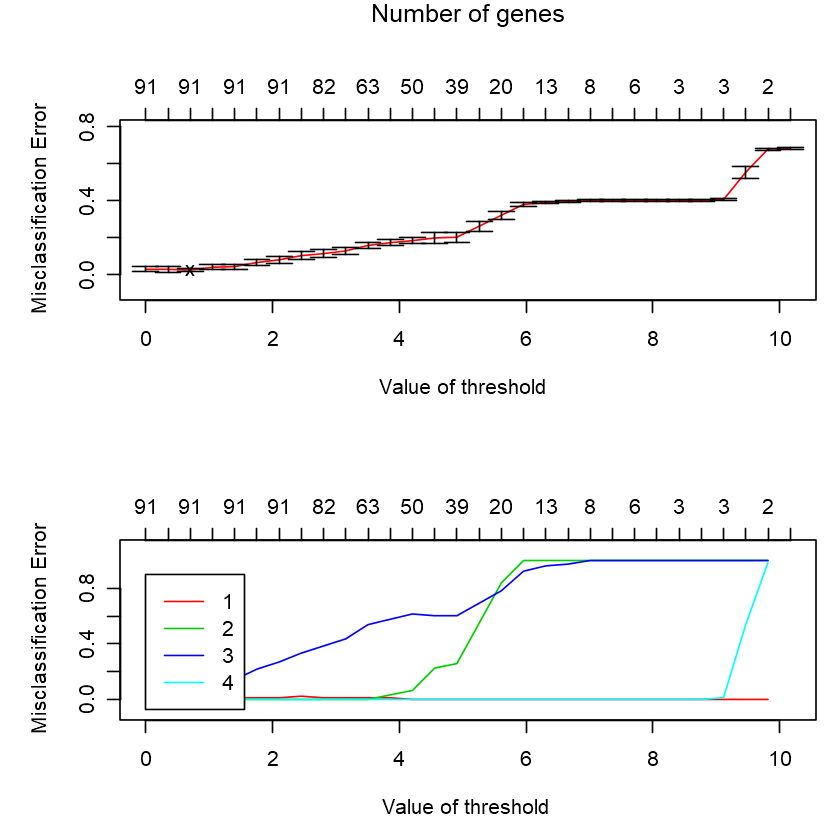

In [27]:
 ## Plot the cross-validated error curves

 #png('cross_validation.png')
 pamr.plotcv(khan.results91)
 #dev.off()

In [28]:
 ## Compute the confusion matrix for a particular model (threshold=4.0) 
 pamr.confusion(khan.results91, threshold=0.1)

   1  2  3  4 Class Error rate
1 85  0  1  0       0.01162791
2  0 28  3  0       0.09677419
3  2  1 74  1       0.05128205
4  0  0  0 76       0.00000000
Overall error rate= 0.03


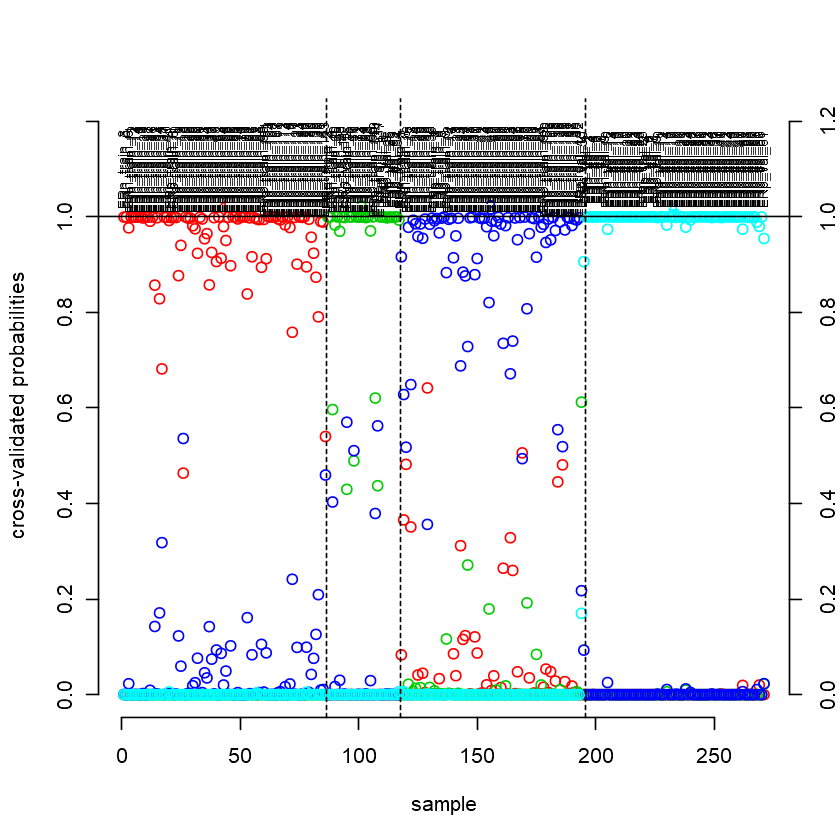

In [29]:
 ## Plot the cross-validated class probabilities by class

 #png('class_probabilites.png')
 pamr.plotcvprob(khan.results91, khan.data91, threshold=0.1)
 #dev.off()

In [43]:
 ## Plot the class centroids

 pdf('fig5.pdf')
 pamr.plotcen(khan.train91, khan.data91, threshold=0.1)
 dev.off()

png 
  2

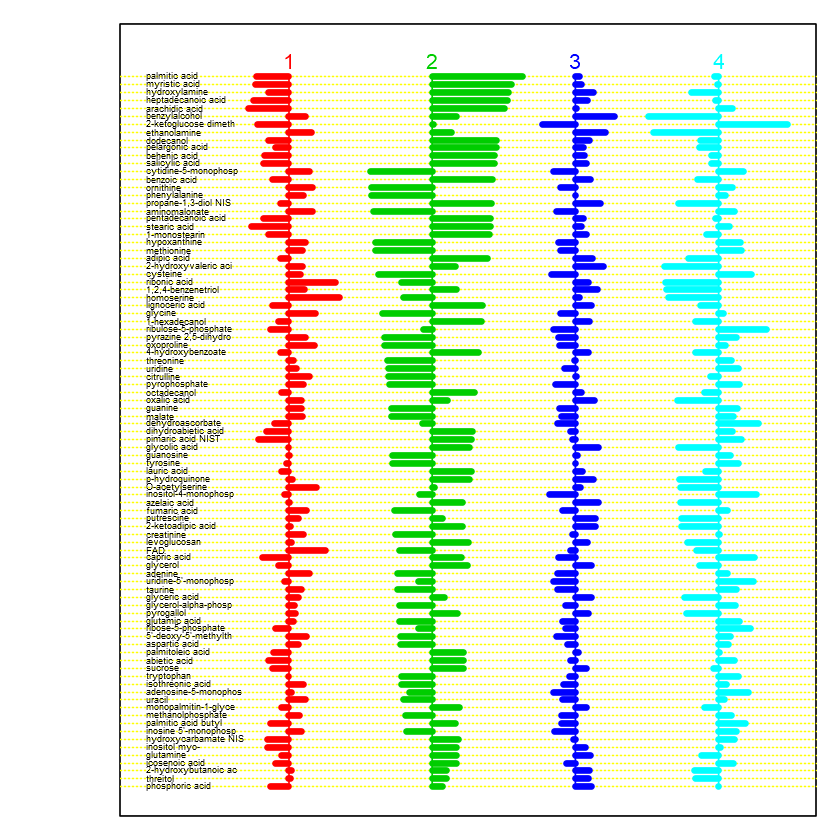

In [31]:
 ## Plot the class centroids

 pdf('class_centriods.pdf')
 pamr.plotcen(khan.train91, khan.data91, threshold=0.1)
 dev.off()

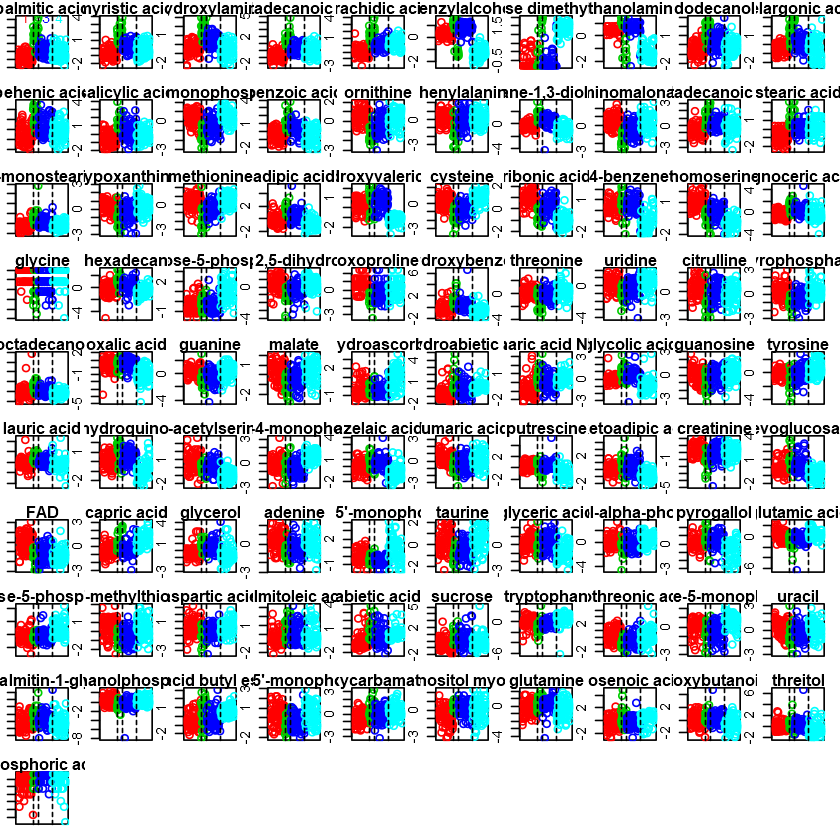

In [32]:
 ## Make a gene plot of the most significant genes
# png('significant_METABOLOITES.png')
 par(mar = rep(1, 4))
 pamr.geneplot(khan.train91, khan.data91, threshold=0.1)
 #dev.off()

In [44]:
# validate metabolomics subtypes
library(Biobase)
library(GEOquery)
gset <- getGEO("GSE59198", GSEMatrix =TRUE, getGPL=T,AnnotGPL=T)
library(lumi)
lumi.N <- lumiN(gset[[1]])
e <- exprs(lumi.N) 
min(e)
e1=log2(e+20)

genes_expression_154=read.csv(file="GENE_EXPRESSION_ER_154.csv",row.names=1)
genes_expression_154=genes_expression_154[,-1]
genes_expression_154=as.data.frame(t(genes_expression_154))
genedata154=t(e1)
rownames(genedata154)=rownames(genes_expression_154)
head(genedata154)
dim(genedata154)



Warning message:
"package 'GEOquery' was built under R version 3.5.2"Setting options('download.file.method.GEOquery'='auto')
Setting options('GEOquery.inmemory.gpl'=FALSE)
Found 1 file(s)
GSE59198_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double(),
  ID_REF = col_character()
)
See spec(...) for full column specifications.
Warning message in download.file(myurl, destfile, mode = mode, quiet = TRUE, method = getOption("download.file.method.GEOquery")):
"cannot open URL 'https://ftp.ncbi.nlm.nih.gov/geo/platforms/GPL16nnn/GPL16807/annot/GPL16807.annot.gz': HTTP status was '404 Not Found'"Annotation GPL not available, so will use submitter GPL instead
File stored at: 
C:\Users\alakwaaf\AppData\Local\Temp\RtmpeaSDTa/GPL16807.soft


Perform quantile normalization ...


[1] -18.23129

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

7A5       A1BG     A1CF     A26A1    A26B1    A26C3    A2BP1    A2M      A2ML1     A3GALT2  ... ZWILCH   ZWINT     ZXDA      ZXDB     ZXDC     ZYG11A   ZYG11B   ZYX       ZZEF1    ZZZ3    
ERn_train_4  10.785386 6.860033 5.616165 5.864065 7.399327 4.829484 6.710272 11.17661 11.417548 6.157542 ... 10.62261 10.321664  9.121160 10.89849 11.00107 8.770161 11.22008  9.751132 10.11137 11.43920
ERn_train_6   9.698045 5.674544 6.108853 7.311705 7.891077 6.970580 5.830541 12.04351  8.417195 4.538544 ... 10.91193  9.187669 10.224747 11.93723  9.08293 7.901847 10.24587  9.066444 10.56760 10.80120
ERn_train_7   7.374111 5.696303 5.429439 6.480159 7.539551 4.443926 6.174651 11.54956 12.063009 4.689374 ... 10.36833  9.478135  9.042653 11.35732 11.18225 8.197133 11.42799 10.615555 10.73471 11.65442
ERn_train_12  8.228624 6.864699 5.648310 6.621682 6.720581 5.248070 5.597520 11.33068  5.205634 4.403259 ... 10.34258  8.487523  9.740735 11.80837 10.57153 7.350444 10.29154  9.791976 10.89336 11.35511
ERn_train_14  8.201483 6.479044 4.960606 6.407804 6.141672 4.606001 4.818685 11.08023  9.412721 4.979756 ... 11.60153  9.948419  9.848294 12.10943 10.21209 8.810059 11.26889  9.696188 10.03028 11.57610
ERn_train_17  8.091210 6.642934 5.462797 6.766190 6.695669 4.864122 5.302927 11.40216  5.717448 4.317273 ... 10.56598  9.353379  9.143940 11.23064 10.45216 8.179394 10.07385  9.979643 10.84702 11.20570

[1]   154 18401

In [49]:
# Load the original data
mmc2 <- (read.csv(file="mmc2.csv",row.names=1))
dim(mmc2)

# Load the normalized one
prostate_df <- read.csv(file="er_162.csv",row.names=1,check.names=F)



#Change columns names based of the normalized data based on the column names of the original data 
colnames(prostate_df)[3:(ncol(prostate_df))]=rownames(mmc2)
#rownames(prostate_df)=colnames(mmc2)[2:ncol(mmc2)]

dim(prostate_df)
table(prostate_df$Label)

# Select only the metabolites, we have 162 metabolites  
meta_154=(merge(prostate_df,genes_expression_154[,c('ER','HER2','subtype')],by=0))
dim(meta_154)
head(meta_154)

metadata154 <-select(meta_154,-c(Label,data,ER,HER2,subtype))
rownames(metadata154)=metadata154[,1]
metadata154=metadata154[-1]
head(metadata154)
dim(metadata154)

[1] 162 272

[1] 271 164


NEG POS 
 67 204 

[1] 152 168

Row.names    Label data  1-hexadecanol 1-monostearin 1,2,4-benzenetriol 1,5-anhydroglucitol 2-aminoadipic acid 2-hydroxybutanoic acid 2-hydroxyglutaric acid ... uracil    urea        uric acid   uridine     uridine-5'-monophosphate valine     xanthine   ER HER2 subtype
1 ERn_train_12 NEG   data3 -0.8428826    -0.4748006    -0.21884822        -0.79736451         -0.63348036        -1.33466867            -0.1493966             ... 1.3677999 -1.65808696 -1.93909704 -0.76218408 -0.4488828               -0.9033616 -1.0606151 0  0    TNBC   
2 ERn_train_14 NEG   data3  0.3710279    -0.4748006     0.07506611         0.37699173          0.07576141         1.21439083             0.6132526             ... 1.6659920  0.09903479  0.07907225  1.37160480  1.0420405               -0.6421987  0.6520825 0  0    TNBC   
3 ERn_train_17 NEG   data3  0.1456194    -0.7884200     0.18946941        -0.07931253          0.35533023        -0.04375526            -0.1864397             ... 0.1005382  1.37213429  1.63853906 -0.32471827 -0.9909949               -0.1568687  0.6086851 0  1    HER2   
4 ERn_train_18 NEG   data3  0.2281459     0.7203622     1.02560959         1.08968011         -1.25538587         0.68358866             0.5423712             ... 0.3245896  1.93839211  0.98533326 -0.07389999 -0.5557764                0.4394813  0.7897990 0  0    TNBC   
5 ERn_train_19 NEG   data3 -0.9828471    -0.4748006     0.36866271         0.52501967         -1.01374131        -0.76146131             0.6953419             ... 1.5252400  0.09903479  0.13351685 -0.11911964 -0.1168805               -0.1568687  0.9272560 0  1    HER2   
6 ERn_train_21 NEG   data3 -0.7072558    -0.6826943    -0.12640710         0.16986691         -0.21203419         0.19241089             0.4710754             ... 0.8130130 -0.21195560  0.07907225 -0.76218408  0.5125939               -0.1568687  1.8686718 0  0    TNBC

1-hexadecanol 1-monostearin 1,2,4-benzenetriol 1,5-anhydroglucitol 2-aminoadipic acid 2-hydroxybutanoic acid 2-hydroxyglutaric acid 2-hydroxyvaleric acid 2-ketoadipic acid 2-ketoglucose dimethylacetal NIST ... trehalose  tryptophan tyrosine   uracil    urea        uric acid   uridine     uridine-5'-monophosphate valine     xanthine  
ERn_train_12 -0.8428826    -0.4748006    -0.21884822        -0.79736451         -0.63348036        -1.33466867            -0.1493966             -0.00166341           -0.02734866       -0.8413411                        ... -0.1972700 -0.2444957 -1.1948348 1.3677999 -1.65808696 -1.93909704 -0.76218408 -0.4488828               -0.9033616 -1.0606151
ERn_train_14  0.3710279    -0.4748006     0.07506611         0.37699173          0.07576141         1.21439083             0.6132526             -0.07437488            0.41803549       -0.8413411                        ... -0.4982083 -3.7125912 -0.9162179 1.6659920  0.09903479  0.07907225  1.37160480  1.0420405               -0.6421987  0.6520825
ERn_train_17  0.1456194    -0.7884200     0.18946941        -0.07931253          0.35533023        -0.04375526            -0.1864397              0.32870966           -0.95303930       -0.8413411                        ...  0.8056957  0.2621917  0.3337228 0.1005382  1.37213429  1.63853906 -0.32471827 -0.9909949               -0.1568687  0.6086851
ERn_train_18  0.2281459     0.7203622     1.02560959         1.08968011         -1.25538587         0.68358866             0.5423712              1.21829991            0.87796931       -0.8413411                        ... -0.1972700 -1.3750630 -0.6216078 0.3245896  1.93839211  0.98533326 -0.07389999 -0.5557764                0.4394813  0.7897990
ERn_train_19 -0.9828471    -0.4748006     0.36866271         0.52501967         -1.01374131        -0.76146131             0.6953419              1.21829991            0.67917809       -0.8413411                        ...  0.4617142 -0.2444957  1.0558605 1.5252400  0.09903479  0.13351685 -0.11911964 -0.1168805               -0.1568687  0.9272560
ERn_train_21 -0.7072558    -0.6826943    -0.12640710         0.16986691         -0.21203419         0.19241089             0.4710754              1.07284238           -0.54803415       -0.8413411                        ...  1.4180017 -0.3856378  0.1197159 0.8130130 -0.21195560  0.07907225 -0.76218408  0.5125939               -0.1568687  1.8686718

[1] 152 162

In [45]:
# How many subtypes
### Remove two patients they have unknown her2
dim(genedata154)
dim(genes_expression_154)
# which samples have unjnow her2
which_samples_to_remove=rownames(genes_expression_154[which(genes_expression_154[,'HER2']==' unknown'),])
which_samples_to_remove

genedata154=genedata154[!rownames(genedata154) %in% which_samples_to_remove, ]
genes_expression_154=genes_expression_154[!rownames(genes_expression_154) %in% which_samples_to_remove, ]

dim(genedata154)
dim(genes_expression_154)

[1]   154 18401

[1]   154 18404

[1] "ERp_train_119" "ERp_val_20"

[1]   152 18401

[1]   152 18404

In [ ]:
ER  HER2  Subtype 
0   0     TNBC    1
0   1     HER2    2
1   0     LA      3
1   1     LB      4

In [46]:
for(i in 1:nrow(genes_expression_154)){
    
    if (genes_expression_154[i,'ER']==0  & genes_expression_154[i,'HER2']==0)
        {genes_expression_154[i,'subtype']='TNBC'}
        
    else if(genes_expression_154[i,'ER']==0  & genes_expression_154[i,'HER2']==1)
       {genes_expression_154[i,'subtype']='HER2'}
        
    else if(genes_expression_154[i,'ER']==1  & genes_expression_154[i,'HER2']==0)
       {genes_expression_154[i,'subtype']='LA'}
        
    else
      genes_expression_154[i,'subtype']='LB'
    
    
}

In [50]:
# Are the PAM 50 genes shows difference between these subtypes
pam50=c('UBE2T','BIRC5','NUF2','CDC6','CCNB1','TYMS','MYBL2','CEP55','MELK','NDC80',
'RRM2','UBE2C','CENPF','PTTG1','EXO1','ORC6L','ANLN','CCNE1','CDC20','MKI67','KIF2C','ACTR3B','MYC',
'EGFR','KRT5','PHGDH','CDH3','MIA','KRT17','FOXC1','SFRP1','KRT14','ESR1','SLC39A6','BAG1','MAPT','PGR',
'CXXC5','MLPH','BCL2','MDM2','NAT1','FOXA1','BLVRA','MMP11','GPR160','FGFR4','GRB7','TMEM45B','ERBB2')
length(pam50)
length(intersect(pam50, colnames(genedata154)))
library(tidyverse)
genedata154=data.frame(genedata154)



pam50data= genedata154 %>% rownames_to_column("gene") %>%select(c(pam50,'gene')) %>% mutate(ER=genes_expression_154$ER,
                        her2=genes_expression_154$HER2,subtype=genes_expression_154$subtype)%>% arrange(ER)%>% 
column_to_rownames("gene")

head(pam50data)
set.seed(123)
kmM <- kmeans(metadata154,4,10000)
km <- kmeans(pam50data[,!colnames(pam50data) %in% c('ER','her2','subtype') ],4,10000)
pam50data =pam50data %>% rownames_to_column("gene") %>% mutate(PAM50gene_cluster=factor(km$cluster),
                                                              Meta_cluster=factor(kmM$cluster)) %>% 
arrange(PAM50gene_cluster) %>%column_to_rownames("gene")

head(pam50data)
######All genes
#allgenesdata= genedata154 %>% rownames_to_column("gene") %>% mutate(ER=genes_expression_154$ER,
 #                       her2=genes_expression_154$HER2,subtype=genes_expression_154$subtype)%>% arrange(ER)%>% 
#column_to_rownames("gene")

#head(allgenesdata)


[1] 50

[1] 50

UBE2T    BIRC5    NUF2      CDC6     CCNB1     TYMS      MYBL2    CEP55     MELK      NDC80     ... BLVRA     MMP11    GPR160    FGFR4     GRB7     TMEM45B   ERBB2    ER her2 subtype
ERn_train_4  11.79156 9.316218  9.550691 9.442602 10.030638  9.889026 5.279972  9.957000 10.658687 10.981854 ... 10.519428 13.44518  9.679541 11.886320 12.68044 10.963035 12.32151 0  1    HER2   
ERn_train_6  11.69470 7.227665  9.796496 8.252368  9.891776  8.178930 4.960606 10.262140  9.613390 10.714861 ... 10.863459 13.01221 10.096765 11.566061 12.43036  8.191208 11.80115 0  1    HER2   
ERn_train_7  12.08839 9.787158  9.887202 9.179413 10.358262  9.545293 5.272813 10.247478 11.252445 10.222350 ...  9.984599 13.13147  7.698132 10.015770 10.92441  7.304370 11.02991 0  0    TNBC   
ERn_train_12 11.10362 7.112448  8.171744 7.924643  8.483473  9.324256 6.069041  9.536421  9.370945  9.582032 ... 10.406104 13.54413  9.800354 10.838526 10.77704  9.005948 10.28008 0  0    TNBC   
ERn_train_14 12.49042 9.223742 10.000976 9.226394 10.145343 10.394594 6.158727 10.963998 12.303707 11.459806 ... 10.405774 13.13509  8.144152  8.505272 10.54737  6.282394 10.21118 0  0    TNBC   
ERn_train_17 11.68794 7.955368  8.790646 8.647420  9.588044  9.543095 6.148424  9.804420 10.349701  9.681491 ... 10.550803 14.05119  8.487523 11.326498 12.63700 10.378434 12.19274 0  1    HER2

UBE2T    BIRC5    NUF2     CDC6     CCNB1     TYMS     MYBL2    CEP55     MELK      NDC80     ... GPR160    FGFR4    GRB7     TMEM45B   ERBB2    ER her2 subtype PAM50gene_cluster Meta_cluster
ERn_train_4  11.79156 9.316218 9.550691 9.442602 10.030638 9.889026 5.279972  9.957000 10.658687 10.981854 ...  9.679541 11.88632 12.68044 10.963035 12.32151 0  1    HER2    1                 3           
ERn_train_6  11.69470 7.227665 9.796496 8.252368  9.891776 8.178930 4.960606 10.262140  9.613390 10.714861 ... 10.096765 11.56606 12.43036  8.191208 11.80115 0  1    HER2    1                 3           
ERn_train_12 11.10362 7.112448 8.171744 7.924643  8.483473 9.324256 6.069041  9.536421  9.370945  9.582032 ...  9.800354 10.83853 10.77704  9.005948 10.28008 0  0    TNBC    1                 4           
ERn_train_17 11.68794 7.955368 8.790646 8.647420  9.588044 9.543095 6.148424  9.804420 10.349701  9.681491 ...  8.487523 11.32650 12.63700 10.378434 12.19274 0  1    HER2    1                 3           
ERn_train_19 11.27236 8.013474 8.759208 9.179820  9.497787 9.855196 5.279972 10.003929 10.717707 10.136876 ... 10.016866 10.59265 11.42288 10.922589 11.74276 0  1    HER2    1                 1           
ERn_train_31 11.61061 7.295381 9.517872 8.767749  9.445980 8.900583 4.995625 10.181032  9.396255 10.466072 ...  9.729027 11.55154 12.44931  9.943574 11.84182 0  1    HER2    1                 3

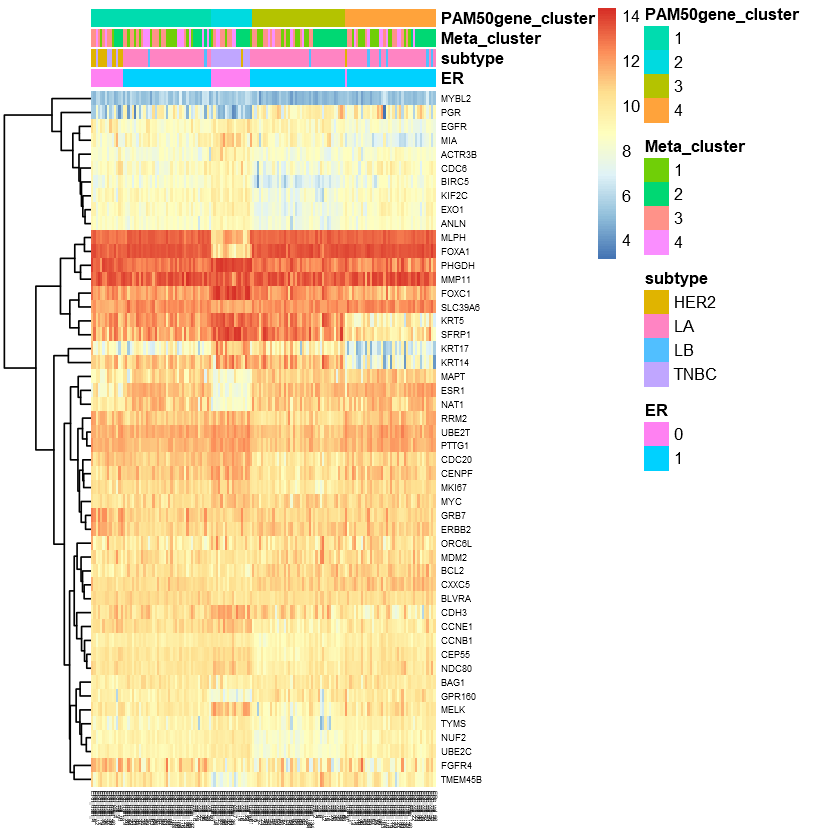

In [51]:

pheatmap(as.matrix(t(pam50data[,!colnames(pam50data) %in% c('ER','her2','subtype','PAM50gene_cluster','Meta_cluster') ])),
         annotation=pam50data[,c('ER','subtype','Meta_cluster','PAM50gene_cluster')],cluster_cols=F,fontsize_row=5,fontsize_col=3)

In [52]:

pheatmap(as.matrix(t(pam50data[,!colnames(pam50data) %in% c('ER','her2','subtype','PAM50gene_cluster','Meta_cluster') ])),
         annotation=pam50data[,c('ER','subtype','Meta_cluster','PAM50gene_cluster')],cluster_cols=F,fontsize_row=5,fontsize_col=3,
        filename="fig6.pdf",show_colnames=F)